<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)
# y = np.column_stack([y])

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'])

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [69]:
class Search():
    def __init__(self, jump = 0.1, depth = 1000):
        self.jump = jump
        self.depth = depth


    def create_solutions(self):
        weights = list()
        weights.append((0, 0, 0))

        i = 0
        for w in weights:
            if i > self.depth:
                break
            i += 1

            if (w[0] + self.jump, w[1], w[2]) not in weights:
                weights.append((w[0] + self.jump, w[1], w[2]))

            if (w[0] - self.jump, w[1], w[2]) not in weights:
                weights.append((w[0] - self.jump, w[1], w[2]))

            if (w[0], w[1] + self.jump, w[2]) not in weights:
                weights.append((w[0], w[1] + self.jump, w[2]))

            if (w[0], w[1] - self.jump, w[2]) not in weights:
                weights.append((w[0], w[1] - self.jump, w[2]))

            if (w[0], w[1], w[2] + self.jump) not in weights:
                weights.append((w[0], w[1], w[2] + self.jump))

            if (w[0], w[1], w[2] - self.jump) not in weights:
                weights.append((w[0], w[1], w[2] + self.jump))

        weights = weights
        weights = list(dict.fromkeys(weights))
        self.weights = weights

    def fit(self, X, y):
        self.create_solutions()
        best_score = 0
        for w in self.weights:
            predictions = list()
            for line in X:
                pred = line[0] * w[0] + line[1] * w[1] + w[2]
                pred = 0 if pred <= 0 else 1
                predictions.append(pred)
            predictions = np.array(predictions)
            score = self.score(y, predictions)
            if score > best_score:
                best_score = score
                self.best_weights = w

    def score(self, y, y_pred):
        return np.sum(y == y_pred) / y.shape[0]

    def predict(self, X):
        predictions = list()
        for line in X:
            pred = line[0] * self.best_weights[0] + line[1] * self.best_weights[1] + self.best_weights[2]
            pred = 0 if pred <= 0 else 1
            predictions.append(pred)
        predictions = np.array(predictions)
        return predictions

se = Search()
se.fit(X_train, y_train)
pred = se.predict(X_test)
se.score(y_test, pred)

1.0

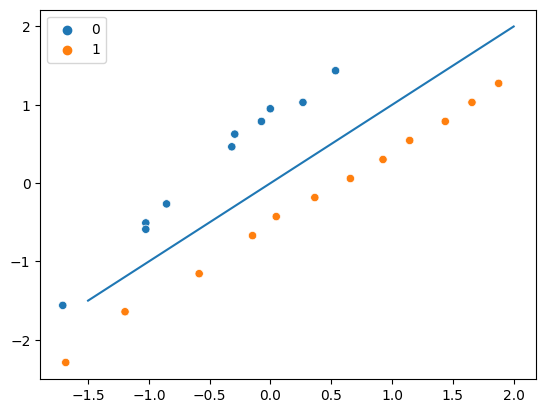

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

y = lambda x : (-se.best_weights[0] * x - se.best_weights[2]) / se.best_weights[1]

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train.to_numpy())
plt.plot([-1.5, 2.0], [y(-1.5), y(2.0)])

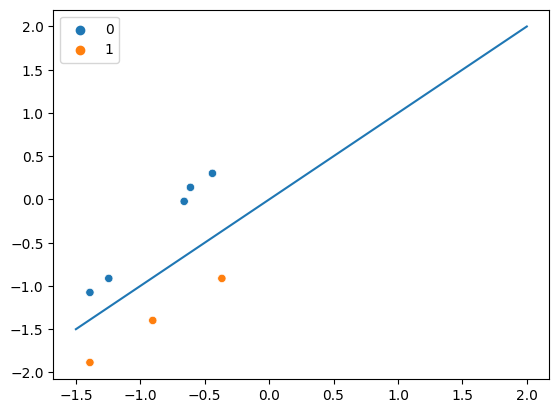

In [62]:
y = lambda x : (-se.best_weights[0] * x - se.best_weights[2]) / se.best_weights[1]

sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.to_numpy())
plt.plot([-1.5, 2.0], [y(-1.5), y(2.0)])

In [71]:
from sklearn.model_selection import ShuffleSplit
import warnings

warnings.filterwarnings('ignore')

rs = ShuffleSplit(n_splits=5, test_size=0.33, random_state=1)

train_score = np.array([])
test_score = np.array([])

for i,(train_data, test_data)in enumerate(rs.split(df.drop(columns=['fruta']))):
    print(f'Iteração {i+1}')
    train_data_i = df.query(' index in @train_data')
    X_train_i = train_data_i.drop(columns=['fruta'])
    y_train_i = train_data_i['fruta']

    test_data_i = df.query('index in @test_data')
    X_test_i = test_data_i.drop(columns=['fruta'])
    y_test_i = test_data_i['fruta']

    X_train_i, X_test_i, y_train_i, y_test_i = X_train_i.to_numpy(), X_test_i.to_numpy(), y_train_i.to_numpy(), y_test_i.to_numpy()
    se = Search(depth = 10000)

    se.fit(X_train_i, y_train_i)

    y_pred_train_i = se.predict(X_train_i)
    y_pred_test_i = se.predict(X_test_i)

    train_score_i = se.score(y_pred_train_i, y_train_i)
    test_score_i = se.score(y_pred_test_i, y_test_i)

    train_score = np.append(train_score, train_score_i)
    test_score = np.append(test_score, test_score_i)

    print(f'Precisão na base de treino: {train_score_i}')
    print(f'Precisão na base de teste: {test_score_i}')

print(f'\nPrecisão média:\n\tTeste: {train_score.mean()}\n\tTreino: {test_score.mean()}')
print(f'STD médio:\n\tTeste: {train_score.std()}\n\tTreino: {test_score.std()}')

Iteração 1
Precisão na base de treino: 0.65
Precisão na base de teste: 0.4
Iteração 2
Precisão na base de treino: 0.55
Precisão na base de teste: 0.6
Iteração 3
Precisão na base de treino: 0.8
Precisão na base de teste: 0.3
Iteração 4
Precisão na base de treino: 0.6
Precisão na base de teste: 0.6
Iteração 5
Precisão na base de treino: 0.6
Precisão na base de teste: 0.7

Precisão média:
	Teste: 0.64
	Treino: 0.5199999999999999
STD médio:
	Teste: 0.08602325267042628
	Treino: 0.14696938456699069
